# Amazon Top 500 Books Analysis

### Step 1:  Import useful libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns



### Step 2: Import Kaggle dataset

In [4]:
books = pd.read_csv('C:/Users/vince/MLW/amazon_vincent/bestsellers with categories.csv')


In [13]:
print(books.shape) # 550 rows and 7 categories


(550, 7)


In [15]:
books.head(5) # print out the first 5 rows of dataset

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Step 3: Seaborn Plot

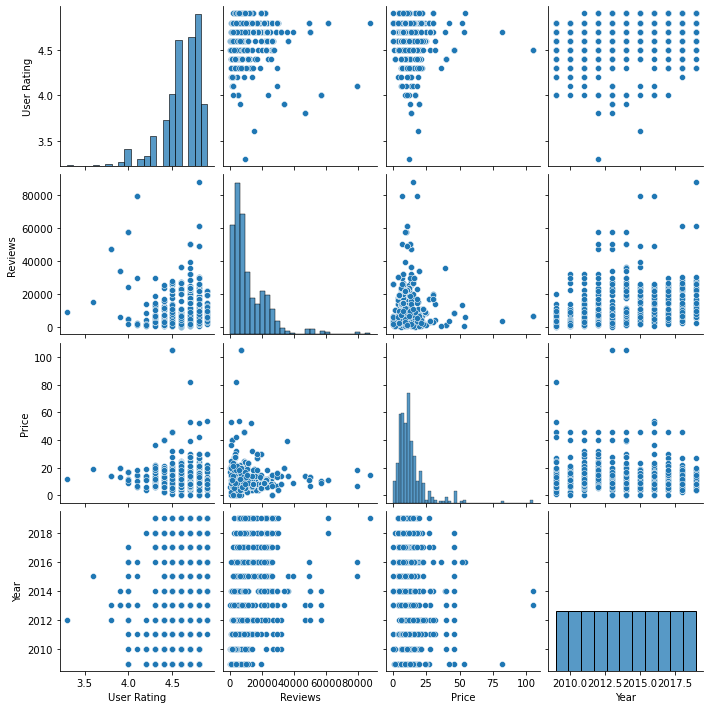

In [8]:
sns.pairplot(books)

<AxesSubplot:>

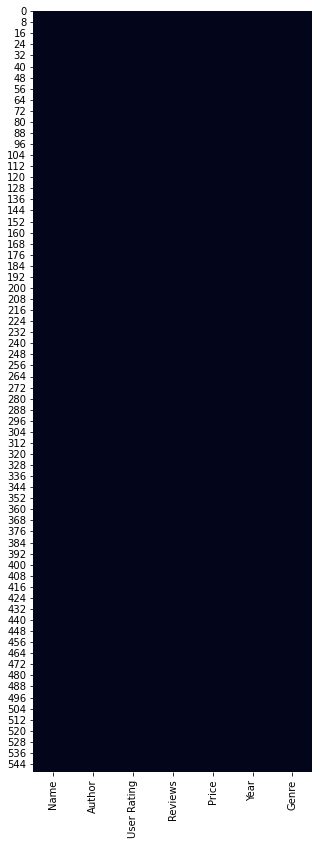

In [12]:
plt.figure(figsize=(5,14))
sns.heatmap(books.isnull(),cbar=False)

###  Step 4: categories correlation analysis


In [21]:
# Null check
features = books.iloc[:,:-1]
feature_names = features.columns
D = len(feature_names)
null_counts = dict().fromkeys(feature_names)
for i in null_counts:
    null_counts[i] = books[i].isnull().sum()
print(null_counts) # There is no missing information in dataset

{'Name': 0, 'Author': 0, 'User Rating': 0, 'Reviews': 0, 'Price': 0, 'Year': 0}


In [23]:
numerical = [feature for feature in books.columns if books[feature].dtype != 'O']

print('There are {} numerical columns in the dataset'.format(len(numerical)))

books[numerical]
# There are 4 numerical columns in the dataset( User rating, Reviews, Price, and Year)

There are 4 numerical columns in the dataset


,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [24]:
# finding the correlation matrix
books.corr()
# Correlation describes the dependency of two variables, it can be either positive or negative, and it's up to 1.
# +-1: highly correlated, 0: no correlation


,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


### Step 5:  numerical categories analysis 

In [25]:
data_numerical = books[numerical]

Text(0, 0.5, 'Price')

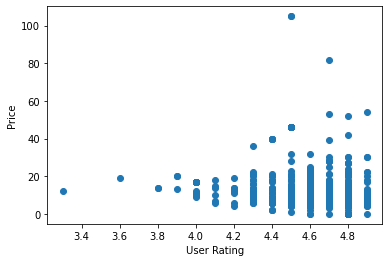

In [34]:
plt.scatter(data_numerical['User Rating'],data_numerical.Price)
plt.xlabel('User Rating')
plt.ylabel("Price")

Text(0, 0.5, 'Review')

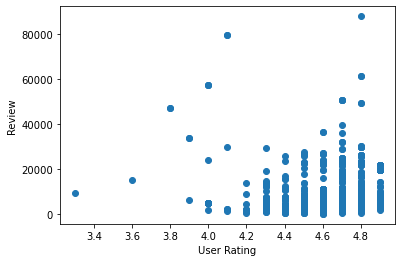

In [35]:
plt.scatter(data_numerical['User Rating'],data_numerical.Reviews)
plt.xlabel('User Rating')
plt.ylabel('Review')

Text(0, 0.5, 'Price')

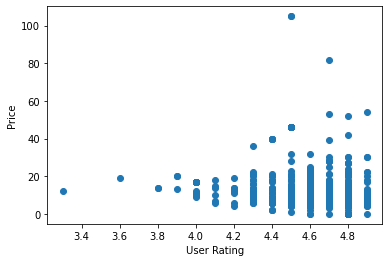

In [36]:
plt.scatter(data_numerical['User Rating'],data_numerical.Price)
plt.xlabel('User Rating')
plt.ylabel("Price")


plt.scatter(data_numerical['User Rating'],data_numerical.Reviews)
plt.xlabel('User Rating')
plt.ylabel('Review')

### Step 6: non-numerical categories analysis

In [39]:
n_numerical = [feature for feature in books.columns if books[feature].dtype == 'O']

print('There are {} numerical columns in the dataset'.format(len(n_numerical)))

books[n_numerical]
# There are 3 non-numerical columns in the dataset( Name, Author, Genre)

There are 3 numerical columns in the dataset


,Name,Author,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Non Fiction
...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,Non Fiction


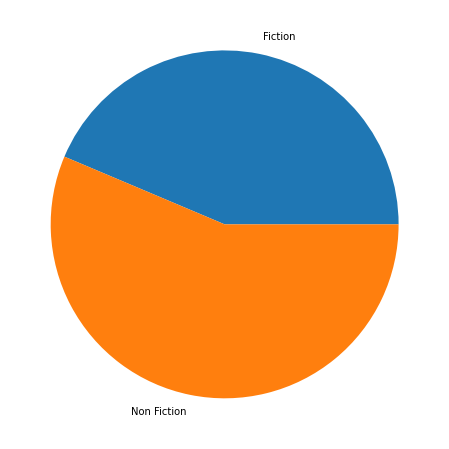

There are 240 friction books in the dataset
There are 310 non-friction books in the dataset


In [51]:
# count the total number of fiction and non friction
genres = ['Fiction', 'Non Fiction']
count = [(books.Genre == 'Fiction').sum(), (books.Genre == 'Non Fiction').sum() ]
fig = plt.figure(figsize =(8, 8))
plt.pie(count, labels = genres)
plt.show()
print('There are {} friction books in the dataset'.format(count[0]))
print('There are {} non-friction books in the dataset'.format(count[1]))

In [89]:
# Find who is the most popular author 
authors = {}
for i in range(len(books['Author'])):
            if books['Author'][i] not in authors:
                   authors[books['Author'][i]]=1
            else:
                    authors[books['Author'][i]]+=1
print('authors list and books number', authors)


authors list and books number {'JJ Smith': 1, 'Stephen King': 4, 'Jordan B. Peterson': 1, 'George Orwell': 1, 'National Geographic Kids': 1, 'George R. R. Martin': 2, 'Amor Towles': 1, 'James Comey': 1, 'Fredrik Backman': 2, 'Larry Schweikart': 1, 'Jaycee Dugard': 1, "Madeleine L'Engle": 1, 'Steve Harvey': 1, 'Adult Coloring Book Designs': 1, 'Blue Star Coloring': 2, 'Coloring Books for Adults': 1, 'Ron Chernow': 1, 'Anthony Doerr': 2, 'Veronica Roth': 4, 'Chris Kyle': 1, 'Khaled Hosseini': 1, 'Glenn Beck': 3, 'Neil deGrasse Tyson': 1, 'Mark Twain': 1, 'DK': 2, 'Angie Grace': 1, 'Ina Garten': 3, 'Michelle Obama': 2, 'Atul Gawande': 1, 'Ta-Nehisi Coates': 2, 'Bruce Springsteen': 1, 'Stephenie Meyer': 7, 'Bill Martin Jr.': 2, 'Jeff Kinney': 12, "Sasha O'Hara": 1, 'David Goggins': 1, 'Thomas Piketty': 1, 'Suzanne Collins': 11, 'Chrissy Teigen': 1, 'Francis Chan': 3, 'Kevin Kwan': 1, 'Marjorie Sarnat': 2, 'Abraham Verghese': 2, 'Brené Brown': 1, 'Malcolm Gladwell': 4, 'Charlaine Harris': 

In [90]:
print('The most popular auther is :',max(authors, key = authors.get) )

The most popular auther is : Jeff Kinney


In [93]:
print('Jeff Kinney has {} books in the list'.format(authors['Jeff Kinney']))

Jeff Kinney has 12 books in the list
